<a href="https://colab.research.google.com/github/NielsRogge/tutorials/blob/main/notebooks/Edit_images_effortlessly_with_FLUX_1_Kontext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set-up environment

We'll install `huggingface_hub` (which is the [Python SDK](https://huggingface.co/docs/huggingface_hub/index) to interact with the 🤗 hub) first.

Note: we install it from source here since FLUX 1. Kontext support is brand new at the time of writing, it will be included in the next [PyPi](https://pypi.org/project/huggingface-hub/) release.

In [2]:
!pip install git+https://github.com/huggingface/huggingface_hub.git

  Cloning https://github.com/huggingface/huggingface_hub.git to /tmp/pip-req-build-x0dc2p99
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/huggingface_hub.git /tmp/pip-req-build-x0dc2p99
  Resolved https://github.com/huggingface/huggingface_hub.git to commit 943a79b4385b9672a96566990a4473c783b4d4d5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Next, make sure to be authenticated with the hub by providing your token (you can create one at https://huggingface.co/settings/tokens - note that in Google Colab you can automatically store it as a [secret](https://medium.com/@parthdasawant/how-to-use-secrets-in-google-colab-450c38e3ec75).

In [2]:
# !huggingface-cli login

## Load image

I'll illustrate how to easily edit images using FLUX. e.g. I had this thumbnail which I recently used for a [YouTube video](https://youtu.be/fTUGVA2EKq0?si=zeymTH75tBLLyNdD) about LM Studio. Pretty cool right?

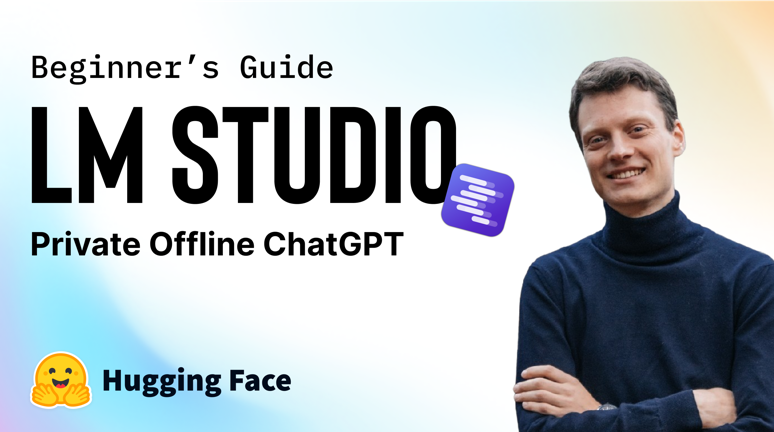

In [10]:
from PIL import Image
import requests

url = "https://huggingface.co/datasets/nielsr/random-data/resolve/main/LM%20Studio%20youtube.png"
image = Image.open(requests.get(url, stream=True).raw)

# let's make it a bit smaller for displaying
width, height = image.size
new_width, new_height = int(width * 0.3), int(height * 0.3)
image.resize((new_width, new_height))

## Edit

Now let's say I want to edit both the title and the subtitle of this image for a new video. Let's say I'd like to make a new video about [Tiny Agents](https://huggingface.co/blog/tiny-agents), a new framework developed by Hugging Face to develop AI agents.

With [FLUX 1. Kontext](https://huggingface.co/black-forest-labs/FLUX.1-Kontext-dev), this is a matter of simply prompting the model! Let's start by editing the title. We use the Python code snippet from [here](https://huggingface.co/black-forest-labs/FLUX.1-Kontext-dev?inference_api=true&language=python&inference_provider=replicate).

In [11]:
import os
import io
from huggingface_hub import InferenceClient
from google.colab import userdata
from PIL import Image

HF_TOKEN = userdata.get('HF_TOKEN')

client = InferenceClient(
    provider="replicate",
    api_key=HF_TOKEN,
)

def edit_image(image: Image.Image, prompt: str) -> Image.Image:
  # convert image to byte array
  img_byte_arr = io.BytesIO()
  image.save(img_byte_arr, format='PNG')
  img_byte_arr = img_byte_arr.getvalue()

  # output is a PIL.Image object
  image = client.image_to_image(
      img_byte_arr,
      prompt=prompt,
      model="black-forest-labs/FLUX.1-Kontext-dev",
  )

  return image

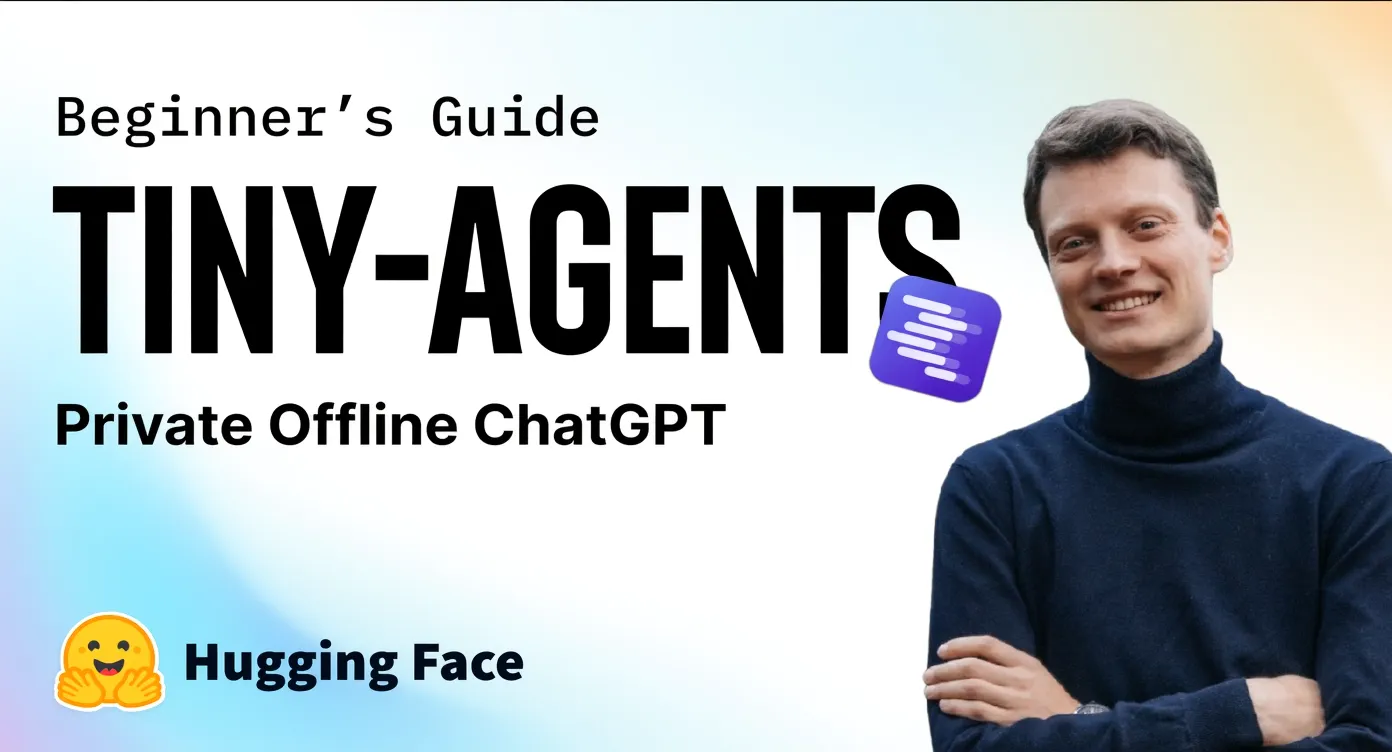

In [13]:
image = edit_image(image, prompt="Replace 'LM Studio' by 'Tiny-Agents'.")
image

Cool! FLUX is ideal for iterative image editing, so now I'll ask it to also edit the subtitle for me.

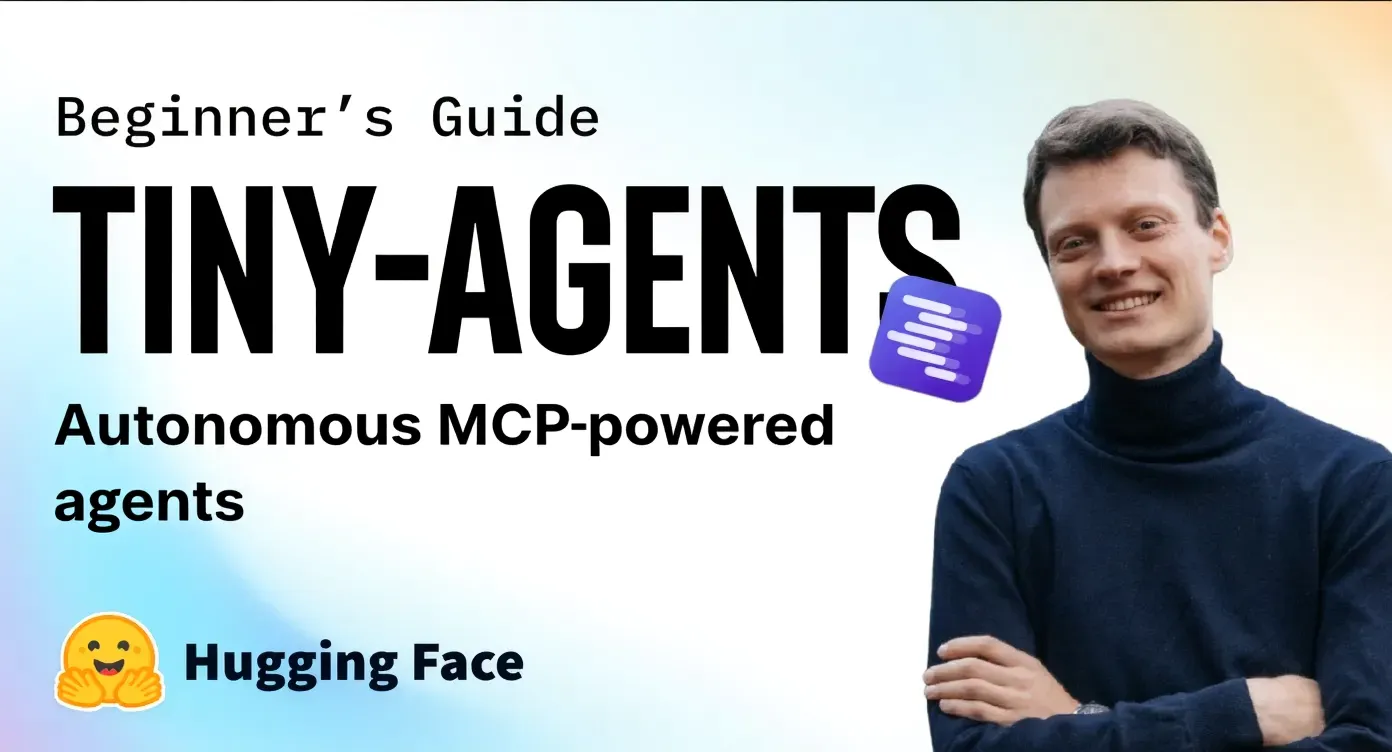

In [14]:
image = edit_image(image, prompt="Replace 'Private Offline ChatGPT' by 'Autonomous MCP-powered agents'.")
image

Great! I noticed there's still a logo of LM Studio so we also want to remove that. Let's just ask it?

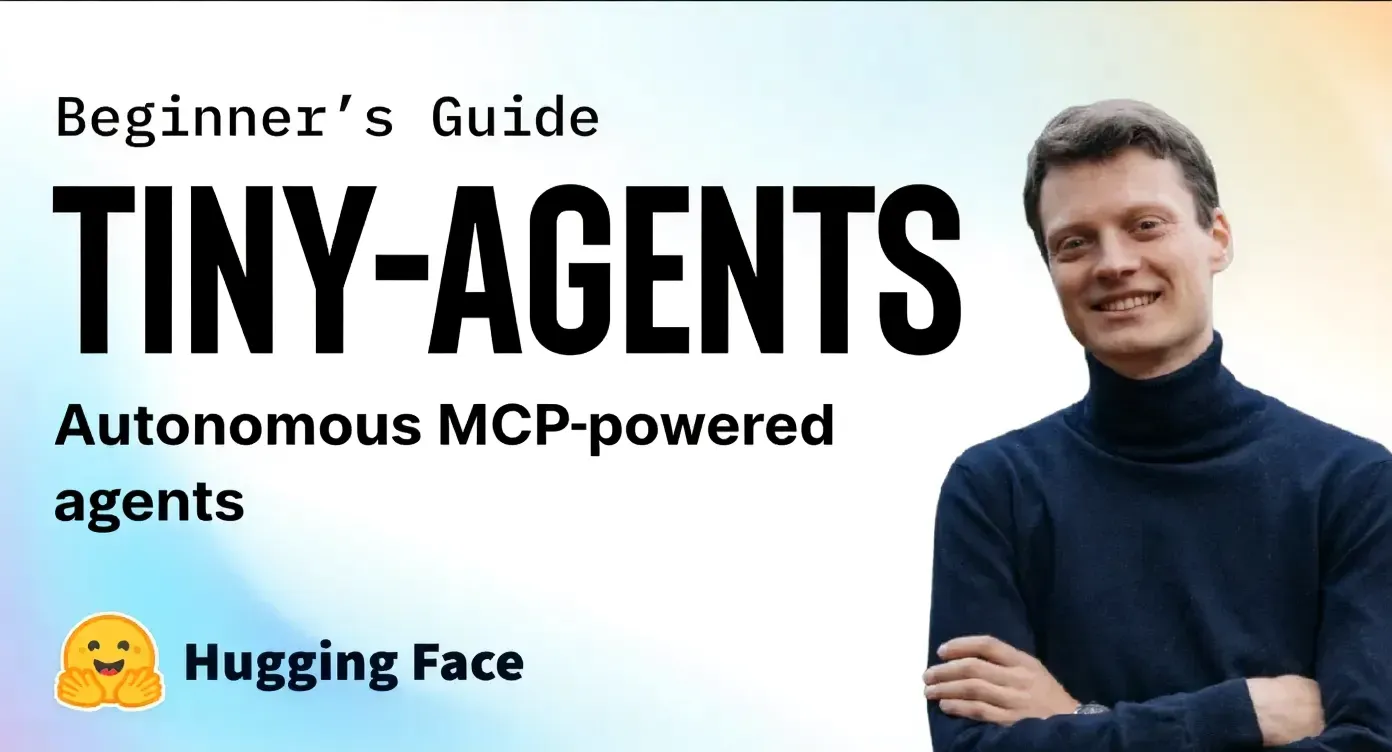

In [15]:
image = edit_image(image, prompt="Remove the purple LM Studio logo.")
image